<a href="https://colab.research.google.com/github/partho2001/featureExtraction_NICU/blob/main/Main_Project_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel('MSF_Dataset.xlsx')

In [3]:
df.head(10)

,Mother_UID,Age_Of_Mother,Weight_Before_Pregnency,Weight_Before_Delivery,Height(cm),BMI,Hemoglobin,PCOS,Age_Father,Yrs_Of_Marriage,...,Full Term,No_Of_Births,Weight_Baby_Kg,Hospital_Stay_In_Days,NICU_Stay,Jaundice,C-section,Vaginal_Delivery,Hours_In_Labour,Induce_Pain
0,1,29,59,60.0,156,25,12.5,0,31,5,...,1,1,2.566,5,0,0,0,1,18,0
1,2,24,54,56.0,145,26,12.5,0,28,2,...,1,1,3.100,5,0,0,0,1,20,0
2,3,28,62,65.0,151,28,11.5,0,31,4,...,1,1,2.150,7,0,0,1,0,5,0
3,4,25,49,52.0,151,22,11.5,0,30,3,...,1,1,2.500,5,0,0,0,1,10,0
4,5,21,39,42.0,151,18,10.1,0,25,2,...,1,1,2.670,5,0,0,0,1,20,0
5,6,32,56,59.0,156,24,10.5,0,38,8,...,1,1,2.560,7,0,0,1,0,10,0
6,7,23,40,45.0,141,21,11.5,0,26,2,...,0,1,2.100,7,1,1,1,0,18,0
7,8,23,52,55.0,159,21,12.5,0,27,2,...,1,1,2.500,5,0,1,0,1,20,0
8,9,29,59,62.0,149,27,11.2,0,33,4,...,1,1,2.940,7,0,0,1,0,12,0
9,10,28,69,72.0,156,29,12.9,0,31,4,...,1,1,2.900,7,0,0,1,0,15,0


In [4]:
df.shape

(450, 131)

In [5]:
df.columns

Index(['Mother_UID', 'Age_Of_Mother', 'Weight_Before_Pregnency',
       'Weight_Before_Delivery', 'Height(cm)', 'BMI', 'Hemoglobin', 'PCOS',
       'Age_Father', 'Yrs_Of_Marriage',
       ...
       'Full Term', 'No_Of_Births', 'Weight_Baby_Kg', 'Hospital_Stay_In_Days',
       'NICU_Stay', 'Jaundice', 'C-section', 'Vaginal_Delivery',
       'Hours_In_Labour', 'Induce_Pain'],
      dtype='object', length=131)

In [6]:
df = df.drop('None',axis=1)
df = df.drop(' Mood_Swings',axis=1)

# Feature in Mother Lifestyle

In [7]:
index_no = df.columns.get_loc("IVF")
index_no

117

In [8]:
feature_df = df.iloc[:, 0:118]
feature_df.head()

,Mother_UID,Age_Of_Mother,Weight_Before_Pregnency,Weight_Before_Delivery,Height(cm),BMI,Hemoglobin,PCOS,Age_Father,Yrs_Of_Marriage,...,Time_Taken_To_Concieve,Family_Income,Issues_Pregnancy_Thyroid,Issues_Pregnancy_HyperTension,Issues_Pregnancy_Diabetes,Issues_Pregnancy_Gastric_Issues,Issues_Pregnancy_Cold_Viral,Issues_Pregnancy_Low_Amniotic,Issues_Pregnancy_High_Amnioic,IVF
0,1,29,59,60.0,156,25,12.5,0,31,5,...,1,2,0,1,1.0,5,0,0,0,0
1,2,24,54,56.0,145,26,12.5,0,28,2,...,1,2,0,0,0.0,4,0,0,0,0
2,3,28,62,65.0,151,28,11.5,0,31,4,...,1,2,0,1,1.0,4,0,0,0,0
3,4,25,49,52.0,151,22,11.5,0,30,3,...,1,2,0,1,1.0,4,0,0,0,0
4,5,21,39,42.0,151,18,10.1,0,25,2,...,1,1,0,0,0.0,3,0,0,0,0


# Dealing with NULL values

In [9]:
null_cols = feature_df.columns[feature_df.isnull().any()].tolist()
null_cols

['Weight_Before_Delivery',
 'No_of_sibling',
 'Miscarriage_History',
 'Food_Cravings',
 'Wishing_For_Outing',
 'Hobby_Visiting',
 'Hobby_Artistic_Things',
 'Hobby_Shopping',
 'Hobby_Cooking',
 'Hobby_Spending_Time',
 'Hobby_Eating',
 'Hobby_Sitting_Alone',
 'Leave_In_Pregnency',
 'Family_Support_In_Laws',
 'Family_Support_Parents',
 'Family_Support_Husband',
 'Your_Supprot_In_Laws',
 'Your_Supprot_Parents',
 'Your_Support_Others',
 'Issues_Pregnancy_Diabetes']

In [10]:
for col in null_cols:
    feature_df[col] = feature_df[col].fillna(feature_df[col].median())

In [11]:
feature_df.isnull().sum()

Mother_UID                         0
Age_Of_Mother                      0
Weight_Before_Pregnency            0
Weight_Before_Delivery             0
Height(cm)                         0
                                  ..
Issues_Pregnancy_Gastric_Issues    0
Issues_Pregnancy_Cold_Viral        0
Issues_Pregnancy_Low_Amniotic      0
Issues_Pregnancy_High_Amnioic      0
IVF                                0
Length: 118, dtype: int64

# Converting floating value columns into int

In [12]:
floating_value_cols = [col for col in feature_df.columns if feature_df[col].dtype=='float64']
floating_value_cols

['Weight_Before_Delivery',
 'Hemoglobin',
 'No_of_sibling',
 'Miscarriage_History',
 'Food_Cravings',
 'Wishing_For_Outing',
 'Hobby_Visiting',
 'Hobby_Artistic_Things',
 'Hobby_Shopping',
 'Hobby_Cooking',
 'Hobby_Spending_Time',
 'Hobby_Eating',
 'Hobby_Sitting_Alone',
 'Leave_In_Pregnency',
 'Family_Support_In_Laws',
 'Family_Support_Parents',
 'Family_Support_Husband',
 'Your_Supprot_In_Laws',
 'Your_Supprot_Parents',
 'Your_Support_Others',
 'Issues_Pregnancy_Diabetes']

In [13]:
for col in floating_value_cols:
    if col != 'Hemoglobin':
        feature_df[col] = feature_df[col].astype(int)

# Checking frequency counts of values of columns

In [14]:
for col in feature_df.columns:
    print(feature_df[col].value_counts())

1      1
338    1
308    1
307    1
306    1
      ..
147    1
146    1
145    1
144    1
450    1
Name: Mother_UID, Length: 450, dtype: int64
25    55
28    45
27    39
23    38
26    35
24    32
29    25
22    25
30    24
20    24
21    22
31    15
32    15
33    12
34    11
35     9
38     5
36     5
19     5
37     3
41     2
18     1
39     1
52     1
40     1
Name: Age_Of_Mother, dtype: int64
50    47
52    36
48    32
55    29
45    27
49    26
62    20
69    19
59    18
58    16
56    16
68    15
60    13
51    12
57     9
72     9
40     8
70     8
53     8
41     7
65     6
81     5
66     5
46     4
64     4
63     4
42     4
67     4
77     4
75     4
54     3
78     3
76     3
80     3
71     3
82     3
74     2
61     2
79     2
83     1
73     1
39     1
43     1
85     1
95     1
44     1
Name: Weight_Before_Pregnency, dtype: int64
64    255
72     24
62     13
60     11
66     10
74      9
63      8
58      8
55      7
68      7
52      7
65      6
57      6
50      6


In [15]:
variable_frequency_cols = ['Age_Of_Mother','Weight_Before_Pregnency','Weight_Before_Delivery','Height(cm)','BMI','Age_Father','Hemoglobin']
change_cols = ['Excercise_During_Teenage','Excercise_After_Marriage','Excercise_During_Pregnency','Time_Spent_Mobile_Teengage','Time_Spent_Mobile_After_Marraige','Time_Spent_Mobile_During_Pregnency','Outside_Food_During_Teenage','Outside_Food_After_Marriage','Outside_Food_During_Pregnency','Tea_During_Teenage','Tea_After_Marriage','Tea_During_Pregnency','Smoke_During_Teenage','Smoke_After_Marriage','Smoke_During_Pregnency','Alcohol_During_Teenage','Alcohol_After_Marraige','Alcohol_During_Pregnency','Pollution_During_Teenage','Pollution_After_Marraige','Pollution_During_Pregnency','Health_Concious_During_Teenage','Health_Concious_After_Marriage','Health_Concious_During_Pregnency','Food_Cravings','Wishing_For_Outing','Hobby_Visiting','Hobby_Artistic_Things','Hobby_Shopping','Hobby_Cooking','Hobby_Spending_Time','Hobby_Eating','Hobby_Sitting_Alone','Menstrual_Cycle_Teenage','Menstrual_Cycle_Marraige','Sunlight_Teenage','Sunlight_Marraige','Sunlight_Pregnency','Travel_Time_Teenage','Travel_Time_Marraige','Travel_Time_Pregnency','Works_As_Marraige','Works_As_Pregnency','Leave_In_Pregnency','Works_Hours_Marraige','Works_Hours_Pregnency','Stress_Marraige','Stress_Pregnency','Family_Support_In_Laws','Family_Support_Parents','Family_Support_Husband','Happy_About_Pregnency','Contraceptive_Time','Contraceptive_Type','Intercourse','Depressed_Marraige','Depressed_Pregnency','Time_Taken_To_Concieve','Family_Income']

# Checking outliers

<Axes: >

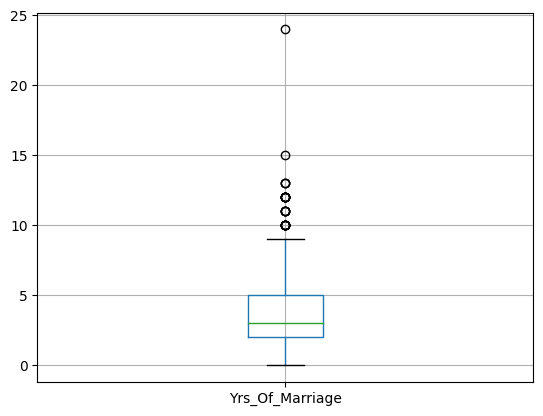

In [16]:
feature_df.boxplot(column='Yrs_Of_Marriage')

In [17]:
rows_to_del = np.where(feature_df['Yrs_Of_Marriage'] >= 10)

In [18]:
feature_df = feature_df[feature_df['Yrs_Of_Marriage'] < 10]

<Axes: >

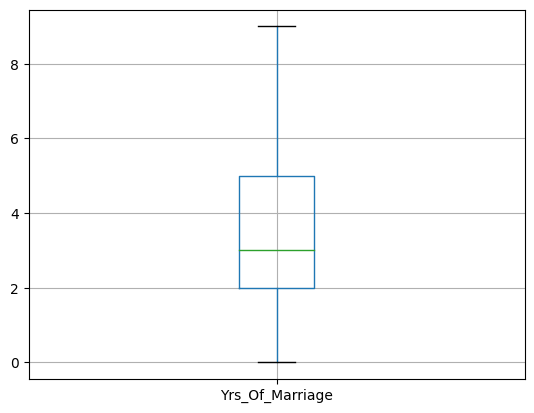

In [19]:
feature_df.boxplot(column='Yrs_Of_Marriage')

<Axes: >

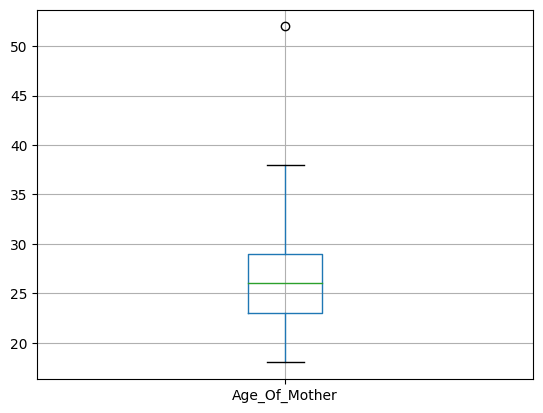

In [20]:
feature_df.boxplot(column='Age_Of_Mother')

In [21]:
np.where(feature_df['Age_Of_Mother'] > 50)

(array([201]),)

In [22]:
rows_to_del = list(rows_to_del)
rows_to_del.append(201)
feature_df = feature_df[feature_df['Age_Of_Mother'] <= 50]

<Axes: >

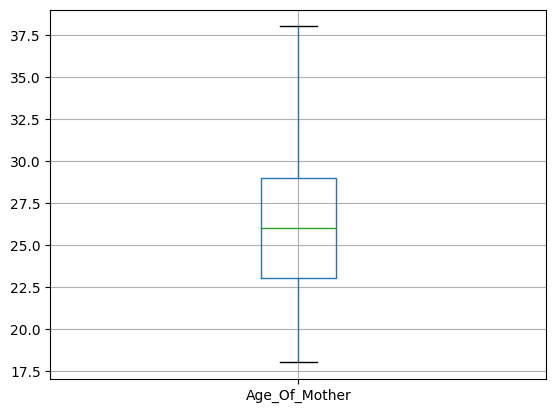

In [23]:
feature_df.boxplot(column='Age_Of_Mother')

In [24]:
feature_df.shape

(421, 118)

# Scaling data

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

feature_df[variable_frequency_cols] = scaler.fit_transform(feature_df[variable_frequency_cols])

In [26]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df[change_cols] = df[change_cols].apply(lambda x: encoder.fit_transform(x))

In [27]:
feature_df.head()

,Mother_UID,Age_Of_Mother,Weight_Before_Pregnency,Weight_Before_Delivery,Height(cm),BMI,Hemoglobin,PCOS,Age_Father,Yrs_Of_Marriage,...,Time_Taken_To_Concieve,Family_Income,Issues_Pregnancy_Thyroid,Issues_Pregnancy_HyperTension,Issues_Pregnancy_Diabetes,Issues_Pregnancy_Gastric_Issues,Issues_Pregnancy_Cold_Viral,Issues_Pregnancy_Low_Amniotic,Issues_Pregnancy_High_Amnioic,IVF
0,1,0.680295,0.248492,-0.640639,-0.203977,0.571687,0.064917,0,0.061232,5,...,1,2,0,1,1,5,0,0,0,0
1,2,-0.555271,-0.259349,-1.259592,-1.221884,0.872162,0.064917,0,-0.588648,2,...,1,2,0,0,0,4,0,0,0,0
2,3,0.433182,0.553197,0.133053,-0.666662,1.473111,-0.078322,0,0.061232,4,...,1,2,0,1,1,4,0,0,0,0
3,4,-0.308158,-0.767189,-1.878545,-0.666662,-0.329737,-0.078322,0,-0.155395,3,...,1,2,0,1,1,4,0,0,0,0
4,5,-1.296610,-1.782871,-3.425928,-0.666662,-1.531636,-0.278856,0,-1.238528,2,...,1,1,0,0,0,3,0,0,0,0


# Checking Highly Co-related features

In [28]:
corr_matrix = feature_df.corr()

threshold = 0.9

high_corr_values = corr_matrix[corr_matrix > threshold]

In [29]:
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)

In [30]:
high_corr_values

,Mother_UID,Age_Of_Mother,Weight_Before_Pregnency,Weight_Before_Delivery,Height(cm),BMI,Hemoglobin,PCOS,Age_Father,Yrs_Of_Marriage,Fertility_Treatment,Sibling,No_of_sibling,Education,Miscarriage_History,Excercise_During_Teenage,Excercise_After_Marriage,Excercise_During_Pregnency,Time_Spent_Mobile_Teengage,Time_Spent_Mobile_After_Marraige,Time_Spent_Mobile_During_Pregnency,Outside_Food_During_Teenage,Outside_Food_After_Marriage,Outside_Food_During_Pregnency,Tea_During_Teenage,Tea_After_Marriage,Tea_During_Pregnency,Smoke_During_Teenage,Smoke_After_Marriage,Smoke_During_Pregnency,Alcohol_During_Teenage,Alcohol_After_Marraige,Alcohol_During_Pregnency,Pollution_During_Teenage,Pollution_After_Marraige,Pollution_During_Pregnency,Health_Concious_During_Teenage,Health_Concious_After_Marriage,Health_Concious_During_Pregnency,Grains_Veges_Pulses_Rice_Teenage,More_Pulses_Rice_Teenage,More_Dairy_Products_Teenage,Snacks_Carbohydrate_Teenage,Non_Veg_Teenage,Fruits_Salads_Teenage,Grains_Veges_Pulses_Rice_Marraige,More_Pulses_Rice_Marraige,More_Dairy_Products_Marraige,Snacks_Carbohydrate_Marraige,Non_Veg_Marraige,Fruits_Salads_Marraige,Grains_Veges_Pulses_Rice_Pregnency,More_Pulses_Rice_Pregnency,More_Dairy_Products_Pregnency,Snacks_Carbohydrate_Pregnency,Non_Veg_Pregnency,Fruits_Salads_Pregnency,Food_Cravings,Wishing_For_Outing,Hobby_Visiting,Hobby_Artistic_Things,Hobby_Shopping,Hobby_Cooking,Hobby_Spending_Time,Hobby_Eating,Hobby_Sitting_Alone,Menstrual_Cycle_Teenage,Menstrual_Cycle_Marraige,Early_Get_Up_Teenage,Night_Person_Teenage,Sleep_More_Teenage,Sleep_Less_Teenage,Early_Get_Up_Marraige,Night_Person_Marraige,Sleep_More_Marraige,Sleep_Less_Marraige,Early_Get_Up_Pregnency,Night_Person_Pregnency,Sleep_More_Pregnency,Sleep_Less_Pregnancy,Sunlight_Teenage,Sunlight_Marraige,Sunlight_Pregnency,Travel_Time_Teenage,Travel_Time_Marraige,Travel_Time_Pregnency,Travel_Mode_Teenage,Travel_Mode_Marraige,Travel_Mode_Pregnency,Works_As_Marraige,Works_As_Pregnency,Leave_In_Pregnency,Works_Hours_Marraige,Works_Hours_Pregnency,Stress_Marraige,Stress_Pregnency,Family_Support_In_Laws,Family_Support_Parents,Family_Support_Husband,Your_Supprot_In_Laws,Your_Supprot_Parents,Your_Support_Others,Happy_About_Pregnency,Contraceptive_Time,Contraceptive_Type,Intercourse,Depressed_Marraige,Depressed_Pregnency,Time_Taken_To_Concieve,Family_Income,Issues_Pregnancy_Thyroid,Issues_Pregnancy_HyperTension,Issues_Pregnancy_Diabetes,Issues_Pregnancy_Gastric_Issues,Issues_Pregnancy_Cold_Viral,Issues_Pregnancy_Low_Amniotic,Issues_Pregnancy_High_Amnioic,IVF
Mother_UID,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age_Of_Mother,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weight_Before_Pregnency,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [31]:
high_corr_values.to_csv('high_corr.csv', index=False)

In [32]:
high_corr_matrix = feature_df[['Excercise_During_Teenage','Excercise_After_Marriage','Time_Spent_Mobile_Teengage','Time_Spent_Mobile_After_Marraige','Outside_Food_During_Teenage','Outside_Food_After_Marriage','Outside_Food_During_Pregnency','Tea_During_Teenage','Tea_After_Marriage','Tea_During_Pregnency','Pollution_During_Teenage','Pollution_After_Marraige','Pollution_During_Pregnency','Health_Concious_During_Teenage','Health_Concious_After_Marriage','Health_Concious_During_Pregnency','Snacks_Carbohydrate_Teenage','Snacks_Carbohydrate_Marraige','Snacks_Carbohydrate_Pregnency','Wishing_For_Outing','Hobby_Visiting','Early_Get_Up_Teenage','Night_Person_Teenage','Sleep_More_Teenage','Sleep_Less_Teenage','Early_Get_Up_Marraige','Night_Person_Marraige','Sleep_More_Marraige','Sleep_Less_Marraige','Early_Get_Up_Pregnency','Sleep_Less_Pregnancy','Sunlight_Teenage','Sunlight_Marraige','Sunlight_Pregnency','Travel_Time_Teenage','Travel_Time_Marraige','Travel_Mode_Teenage','Travel_Mode_Marraige','Family_Support_In_Laws','Family_Support_Parents','Family_Support_Husband','Your_Supprot_In_Laws','Your_Supprot_Parents','Your_Support_Others']].corr()
high_corr_matrix[high_corr_matrix > threshold]

,Excercise_During_Teenage,Excercise_After_Marriage,Time_Spent_Mobile_Teengage,Time_Spent_Mobile_After_Marraige,Outside_Food_During_Teenage,Outside_Food_After_Marriage,Outside_Food_During_Pregnency,Tea_During_Teenage,Tea_After_Marriage,Tea_During_Pregnency,Pollution_During_Teenage,Pollution_After_Marraige,Pollution_During_Pregnency,Health_Concious_During_Teenage,Health_Concious_After_Marriage,Health_Concious_During_Pregnency,Snacks_Carbohydrate_Teenage,Snacks_Carbohydrate_Marraige,Snacks_Carbohydrate_Pregnency,Wishing_For_Outing,Hobby_Visiting,Early_Get_Up_Teenage,Night_Person_Teenage,Sleep_More_Teenage,Sleep_Less_Teenage,Early_Get_Up_Marraige,Night_Person_Marraige,Sleep_More_Marraige,Sleep_Less_Marraige,Early_Get_Up_Pregnency,Sleep_Less_Pregnancy,Sunlight_Teenage,Sunlight_Marraige,Sunlight_Pregnency,Travel_Time_Teenage,Travel_Time_Marraige,Travel_Mode_Teenage,Travel_Mode_Marraige,Family_Support_In_Laws,Family_Support_Parents,Family_Support_Husband,Your_Supprot_In_Laws,Your_Supprot_Parents,Your_Support_Others
Excercise_During_Teenage,1.000000,0.944569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Excercise_After_Marriage,0.944569,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time_Spent_Mobile_Teengage,NaN,NaN,1.000000,0.991934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time_Spent_Mobile_After_Marraige,NaN,NaN,0.991934,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outside_Food_During_Teenage,NaN,NaN,NaN,NaN,1.000000,1.000000,0.954493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outside_Food_After_Marriage,NaN,NaN,NaN,NaN,1.000000,1.000000,0.954493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outside_Food_During_Pregnency,NaN,NaN,NaN,NaN,0.954493,0.954493,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tea_During_Teenage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.996771,0.917688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tea_After_Marriage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.996771,1.000000,0.920639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tea_During_Pregnency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.917688,0.920639,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Dropping highly co-relaated columns

In [33]:
drop_cols = ['Excercise_After_Marriage','Time_Spent_Mobile_After_Marraige','Outside_Food_After_Marriage','Outside_Food_During_Pregnency','Tea_After_Marriage','Tea_During_Teenage','Pollution_After_Marraige','Pollution_During_Teenage','Health_Concious_During_Teenage','Health_Concious_After_Marriage','Snacks_Carbohydrate_Teenage','Snacks_Carbohydrate_Marraige','Hobby_Visiting','Sunlight_Teenage','Sunlight_Marraige','Travel_Time_Teenage','Travel_Mode_Teenage','Family_Support_In_Laws','Family_Support_Parents','Your_Supprot_In_Laws','Your_Supprot_Parents','Early_Get_Up_Marraige','Early_Get_Up_Teenage','Night_Person_Marraige','Sleep_Less_Teenage','Sleep_Less_Marraige','Sleep_More_Marraige']

In [34]:
temp = feature_df.drop(drop_cols, axis=1)
feature_df = feature_df.drop(drop_cols, axis=1)

In [35]:
temp_corr_matrix = temp.corr()

new_corr_mat = temp_corr_matrix[temp_corr_matrix > threshold]

In [36]:
new_corr_mat.to_csv('new_corr_mat.csv', index=False)

# Taking the output cols and merging with the feature dataset

In [37]:
output_cols = ['Mother_UID','PreTerm','Weight_Baby_Kg','NICU_Stay','C-section']

In [38]:
output_df = df[output_cols]

In [39]:
rows_to_del = [ 24,  33,  59, 132, 201, 206, 207, 210, 219, 225, 233, 235, 241, 242, 251, 255, 259, 260, 264, 273, 284, 318, 354, 358, 363, 383, 393, 419, 447]

In [40]:
output_df = output_df.drop(index=rows_to_del)

In [41]:
output_df.shape

(421, 5)

In [42]:
feature_df.shape

(421, 91)

In [43]:
merged_df = pd.merge(feature_df, output_df,on='Mother_UID')

In [44]:
merged_df.head()

,Mother_UID,Age_Of_Mother,Weight_Before_Pregnency,Weight_Before_Delivery,Height(cm),BMI,Hemoglobin,PCOS,Age_Father,Yrs_Of_Marriage,Fertility_Treatment,Sibling,No_of_sibling,Education,Miscarriage_History,Excercise_During_Teenage,Excercise_During_Pregnency,Time_Spent_Mobile_Teengage,Time_Spent_Mobile_During_Pregnency,Outside_Food_During_Teenage,Tea_During_Pregnency,Smoke_During_Teenage,Smoke_After_Marriage,Smoke_During_Pregnency,Alcohol_During_Teenage,Alcohol_After_Marraige,Alcohol_During_Pregnency,Pollution_During_Pregnency,Health_Concious_During_Pregnency,Grains_Veges_Pulses_Rice_Teenage,More_Pulses_Rice_Teenage,More_Dairy_Products_Teenage,Non_Veg_Teenage,Fruits_Salads_Teenage,Grains_Veges_Pulses_Rice_Marraige,More_Pulses_Rice_Marraige,More_Dairy_Products_Marraige,Non_Veg_Marraige,Fruits_Salads_Marraige,Grains_Veges_Pulses_Rice_Pregnency,More_Pulses_Rice_Pregnency,More_Dairy_Products_Pregnency,Snacks_Carbohydrate_Pregnency,Non_Veg_Pregnency,Fruits_Salads_Pregnency,Food_Cravings,Wishing_For_Outing,Hobby_Artistic_Things,Hobby_Shopping,Hobby_Cooking,Hobby_Spending_Time,Hobby_Eating,Hobby_Sitting_Alone,Menstrual_Cycle_Teenage,Menstrual_Cycle_Marraige,Night_Person_Teenage,Sleep_More_Teenage,Early_Get_Up_Pregnency,Night_Person_Pregnency,Sleep_More_Pregnency,Sleep_Less_Pregnancy,Sunlight_Pregnency,Travel_Time_Marraige,Travel_Time_Pregnency,Travel_Mode_Marraige,Travel_Mode_Pregnency,Works_As_Marraige,Works_As_Pregnency,Leave_In_Pregnency,Works_Hours_Marraige,Works_Hours_Pregnency,Stress_Marraige,Stress_Pregnency,Family_Support_Husband,Your_Support_Others,Happy_About_Pregnency,Contraceptive_Time,Contraceptive_Type,Intercourse,Depressed_Marraige,Depressed_Pregnency,Time_Taken_To_Concieve,Family_Income,Issues_Pregnancy_Thyroid,Issues_Pregnancy_HyperTension,Issues_Pregnancy_Diabetes,Issues_Pregnancy_Gastric_Issues,Issues_Pregnancy_Cold_Viral,Issues_Pregnancy_Low_Amniotic,Issues_Pregnancy_High_Amnioic,IVF,PreTerm,Weight_Baby_Kg,NICU_Stay,C-section
0,1,0.680295,0.248492,-0.640639,-0.203977,0.571687,0.064917,0,0.061232,5,0,1,1,5,0,3,3,2,2,2,2,1,1,1,1,1,1,2,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,3,2,1,1,2,3,3,3,1,0,0,1,0,0,3,2,2,3,3,3,1,5,1,1,1,1,2,1,1,1,6,1,2,2,1,2,0,1,1,5,0,0,0,0,0,2.566,0,0
1,2,-0.555271,-0.259349,-1.259592,-1.221884,0.872162,0.064917,0,-0.588648,2,0,0,0,4,0,4,4,3,3,2,2,1,1,1,1,1,1,2,3,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,0,2,2,3,2,1,2,2,3,1,1,0,0,1,0,0,0,3,2,2,3,3,3,1,5,1,1,1,1,2,1,1,1,6,1,2,2,1,2,0,0,0,4,0,0,0,0,0,3.100,0,0
2,3,0.433182,0.553197,0.133053,-0.666662,1.473111,-0.078322,0,0.061232,4,0,1,1,4,0,3,3,2,2,2,2,1,1,1,1,1,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,3,3,3,1,0,0,1,0,0,4,2,2,4,4,3,1,5,1,1,2,2,2,1,1,1,6,1,2,2,1,2,0,1,1,4,0,0,0,0,0,2.150,0,1
3,4,-0.308158,-0.767189,-1.878545,-0.666662,-0.329737,-0.078322,0,-0.155395,3,0,1,1,4,0,4,4,3,3,2,1,1,1,1,1,1,1,2,3,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,0,2,2,3,2,1,1,2,3,2,2,0,0,1,0,0,0,2,2,2,3,3,1,1,5,1,1,1,1,2,3,1,1,6,1,2,2,1,2,0,1,1,4,0,0,0,0,0,2.500,0,0
4,5,-1.296610,-1.782871,-3.425928,-0.666662,-1.531636,-0.278856,0,-1.238528,2,0,0,0,3,0,4,4,1,1,2,2,1,1,1,1,1,1,2,4,1,1,1,0,0,1,1,1,0,0,1,1,1,1,0,0,2,3,3,3,1,1,2,3,2,2,0,1,0,0,1,0,4,2,2,2,2,1,1,5,1,1,1,1,2,1,1,1,6,1,2,2,1,1,0,0,0,3,0,0,0,0,0,2.670,0,0


In [45]:
feature_df.columns

Index(['Mother_UID', 'Age_Of_Mother', 'Weight_Before_Pregnency',
       'Weight_Before_Delivery', 'Height(cm)', 'BMI', 'Hemoglobin', 'PCOS',
       'Age_Father', 'Yrs_Of_Marriage', 'Fertility_Treatment', 'Sibling',
       'No_of_sibling', 'Education', 'Miscarriage_History',
       'Excercise_During_Teenage', 'Excercise_During_Pregnency',
       'Time_Spent_Mobile_Teengage', 'Time_Spent_Mobile_During_Pregnency',
       'Outside_Food_During_Teenage', 'Tea_During_Pregnency',
       'Smoke_During_Teenage', 'Smoke_After_Marriage',
       'Smoke_During_Pregnency', 'Alcohol_During_Teenage',
       'Alcohol_After_Marraige', 'Alcohol_During_Pregnency',
       'Pollution_During_Pregnency', 'Health_Concious_During_Pregnency',
       'Grains_Veges_Pulses_Rice_Teenage', 'More_Pulses_Rice_Teenage',
       'More_Dairy_Products_Teenage', 'Non_Veg_Teenage',
       'Fruits_Salads_Teenage', 'Grains_Veges_Pulses_Rice_Marraige',
       'More_Pulses_Rice_Marraige', 'More_Dairy_Products_Marraige',
       'No

# Applying Feature Selection Methods

In [46]:
feature_names = ['Mother_UID', 'Age_Of_Mother', 'Weight_Before_Pregnency',
       'Weight_Before_Delivery', 'Height(cm)', 'BMI', 'Hemoglobin', 'PCOS',
       'Age_Father', 'Yrs_Of_Marriage', 'Fertility_Treatment', 'Sibling',
       'No_of_sibling', 'Education', 'Miscarriage_History',
       'Excercise_During_Teenage', 'Excercise_During_Pregnency',
       'Time_Spent_Mobile_Teengage', 'Time_Spent_Mobile_During_Pregnency',
       'Outside_Food_During_Teenage', 'Tea_During_Pregnency',
       'Smoke_During_Teenage', 'Smoke_After_Marriage',
       'Smoke_During_Pregnency', 'Alcohol_During_Teenage',
       'Alcohol_After_Marraige', 'Alcohol_During_Pregnency',
       'Pollution_During_Pregnency', 'Health_Concious_During_Pregnency',
       'Grains_Veges_Pulses_Rice_Teenage', 'More_Pulses_Rice_Teenage',
       'More_Dairy_Products_Teenage', 'Non_Veg_Teenage',
       'Fruits_Salads_Teenage', 'Grains_Veges_Pulses_Rice_Marraige',
       'More_Pulses_Rice_Marraige', 'More_Dairy_Products_Marraige',
       'Non_Veg_Marraige', 'Fruits_Salads_Marraige',
       'Grains_Veges_Pulses_Rice_Pregnency', 'More_Pulses_Rice_Pregnency',
       'More_Dairy_Products_Pregnency', 'Snacks_Carbohydrate_Pregnency',
       'Non_Veg_Pregnency', 'Fruits_Salads_Pregnency', 'Food_Cravings',
       'Wishing_For_Outing', 'Hobby_Artistic_Things', 'Hobby_Shopping',
       'Hobby_Cooking', 'Hobby_Spending_Time', 'Hobby_Eating',
       'Hobby_Sitting_Alone', 'Menstrual_Cycle_Teenage',
       'Menstrual_Cycle_Marraige', 'Night_Person_Teenage',
       'Sleep_More_Teenage', 'Early_Get_Up_Pregnency',
       'Night_Person_Pregnency', 'Sleep_More_Pregnency',
       'Sleep_Less_Pregnancy', 'Sunlight_Pregnency', 'Travel_Time_Marraige',
       'Travel_Time_Pregnency', 'Travel_Mode_Marraige',
       'Travel_Mode_Pregnency', 'Works_As_Marraige', 'Works_As_Pregnency',
       'Leave_In_Pregnency', 'Works_Hours_Marraige', 'Works_Hours_Pregnency',
       'Stress_Marraige', 'Stress_Pregnency', 'Family_Support_Husband',
       'Your_Support_Others', 'Happy_About_Pregnency', 'Contraceptive_Time',
       'Contraceptive_Type', 'Intercourse', 'Depressed_Marraige',
       'Depressed_Pregnency', 'Time_Taken_To_Concieve', 'Family_Income',
       'Issues_Pregnancy_Thyroid', 'Issues_Pregnancy_HyperTension',
       'Issues_Pregnancy_Diabetes', 'Issues_Pregnancy_Gastric_Issues',
       'Issues_Pregnancy_Cold_Viral', 'Issues_Pregnancy_Low_Amniotic',
       'Issues_Pregnancy_High_Amnioic', 'IVF']

# Taking target variable as Weight_Baby_Kg

In [47]:
X = merged_df.iloc[:, 1:92]
y = merged_df['Weight_Baby_Kg']

### Using embedded method - Random  Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.tree import export_graphviz

rfc = RandomForestRegressor(n_estimators=100, random_state=42)
rfc.fit(X, y)

importances = rfc.feature_importances_

indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print(f"{feature_names[indices[f]]}: {importances[indices[f]]}")

export_graphviz(rfc.estimators_[0], out_file='tree_nicu.dot', feature_names=feature_names, class_names=['0', '1'], filled=True)

!dot -Tpng tree_nicu.dot -o tree.png

Feature ranking:
IVF: 0.13555152085880715
Mother_UID: 0.06238909882359277
PCOS: 0.056417197187134255
Age_Of_Mother: 0.05551439430771563
BMI: 0.053002281238234354
Weight_Before_Delivery: 0.05108178894264258
Height(cm): 0.04806620212708827
Sleep_Less_Pregnancy: 0.023784838805186722
Alcohol_During_Pregnency: 0.023635180381495213
Weight_Before_Pregnency: 0.023485823023880043
Age_Father: 0.02290475628177646
Pollution_During_Pregnency: 0.020166600191535596
Sleep_More_Teenage: 0.01962454461395772
Travel_Time_Pregnency: 0.015322514858001283
Works_As_Pregnency: 0.014015159086600544
Fruits_Salads_Pregnency: 0.013088656243095962
Miscarriage_History: 0.012365958267780948
Issues_Pregnancy_Diabetes: 0.012317251545472687
Contraceptive_Time: 0.011802728301885385
Stress_Marraige: 0.01136662181276976
Travel_Mode_Pregnency: 0.011058076948625168
Happy_About_Pregnency: 0.010389092829906658
Excercise_During_Teenage: 0.009603882536888627
Time_Spent_Mobile_During_Pregnency: 0.00924571576649058
Excercise_Durin

### Using filter method - f_classif

In [49]:
from sklearn.feature_selection import f_classif

f_values, p_values = f_classif(X, y)

feature_scores = dict(zip(feature_names, f_values))

sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

for feature, score in sorted_features:
    print('{}: {}'.format(feature, score))


BMI: 49.76415247821156
Issues_Pregnancy_Cold_Viral: 2.5835330462460218
Sleep_Less_Pregnancy: 1.8488131552876859
Smoke_After_Marriage: 1.8308650065532708
Issues_Pregnancy_Gastric_Issues: 1.8176933158584532
Depressed_Pregnency: 1.714210919349698
Travel_Mode_Marraige: 1.6396234986275926
Excercise_During_Pregnency: 1.6241788010302096
IVF: 1.5678539766238258
Issues_Pregnancy_High_Amnioic: 1.5124055315344005
Issues_Pregnancy_Low_Amniotic: 1.462391511434311
Yrs_Of_Marriage: 1.457895650835436
Family_Income: 1.457895650835436
Sunlight_Pregnency: 1.3904744092901342
Miscarriage_History: 1.3701048707811896
Travel_Time_Marraige: 1.368969341040581
Excercise_During_Teenage: 1.332762110831383
Health_Concious_During_Pregnency: nan
More_Pulses_Rice_Teenage: 1.567431192660534
Time_Spent_Mobile_Teengage: 1.4541527419405806
Travel_Time_Pregnency: 1.3175905668727443
Night_Person_Pregnency: 1.309717090845104
No_of_sibling: 1.2882397295305694
Issues_Pregnancy_Diabetes: 1.2882397295305694
Sleep_More_Pregnency:

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [28 33 38] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


### Using wrapper method - Recursive Feature Eliminationm

In [50]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor




selector = RFE(DecisionTreeRegressor(), n_features_to_select=20)
selector.fit(X, y)

feature_rankings = pd.Series(selector.ranking_, index=X.columns)

sorted_feature_rankings = feature_rankings.sort_values(ascending=True)

print(sorted_feature_rankings.index.values)


['Age_Of_Mother' 'Intercourse' 'Your_Support_Others' 'Stress_Pregnency'
 'Travel_Mode_Marraige' 'Sunlight_Pregnency' 'Early_Get_Up_Pregnency'
 'Menstrual_Cycle_Teenage' 'Food_Cravings' 'More_Dairy_Products_Pregnency'
 'Health_Concious_During_Pregnency' 'Pollution_During_Pregnency'
 'Excercise_During_Pregnency' 'PreTerm' 'Age_Father' 'Hemoglobin' 'BMI'
 'Weight_Before_Pregnency' 'Height(cm)' 'Yrs_Of_Marriage'
 'Night_Person_Pregnency' 'Non_Veg_Teenage' 'PCOS' 'Works_Hours_Pregnency'
 'Tea_During_Pregnency' 'Contraceptive_Time' 'Hobby_Cooking'
 'Weight_Before_Delivery' 'Leave_In_Pregnency' 'Works_As_Marraige'
 'Issues_Pregnancy_High_Amnioic' 'Smoke_During_Teenage'
 'Alcohol_During_Pregnency' 'Family_Income' 'Time_Spent_Mobile_Teengage'
 'Issues_Pregnancy_HyperTension' 'Excercise_During_Teenage'
 'Issues_Pregnancy_Low_Amniotic' 'Happy_About_Pregnency'
 'Issues_Pregnancy_Gastric_Issues' 'Education'
 'Outside_Food_During_Teenage' 'Works_As_Pregnency' 'Non_Veg_Pregnency'
 'Time_Spent_Mobile_

# Taking target variable as NICU_Stay

In [51]:
X = merged_df.iloc[:, 1:92]
y = merged_df['NICU_Stay']

### Using embedded method - Random  Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import export_graphviz


# Train a Random Forest classifier with information gain as criterion
rfc = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
rfc.fit(X, y)

# Get feature importances
importances = rfc.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Get the names of the features
# feature_names = [f"Feature {i+1}" for i in range(X.shape[1])]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print(f"{feature_names[indices[f]]}: {importances[indices[f]]}")

# Export one of the decision trees as a dot file
export_graphviz(rfc.estimators_[0], out_file='tree_nicu.dot', feature_names=feature_names, class_names=['0', '1'], filled=True)

# Convert the dot file to a png image
!dot -Tpng tree_nicu.dot -o tree.png

Feature ranking:
IVF: 0.058410724433003894
BMI: 0.05237602104826192
Age_Of_Mother: 0.05085186815125207
Weight_Before_Delivery: 0.04941467201766172
PCOS: 0.042484959438409624
Height(cm): 0.036958158171737296
Mother_UID: 0.036869885645269065
Weight_Before_Pregnency: 0.03247530092862933
Age_Father: 0.029867511388488383
Miscarriage_History: 0.02672529871819054
Alcohol_During_Pregnency: 0.021242951584703778
Contraceptive_Type: 0.019550708113917965
No_of_sibling: 0.01843119804984627
Travel_Time_Pregnency: 0.018066354891532865
Excercise_During_Teenage: 0.018027260365008648
Time_Spent_Mobile_During_Pregnency: 0.017909859325496942
Excercise_During_Pregnency: 0.016818556659447915
Issues_Pregnancy_Diabetes: 0.016267164173416202
Time_Taken_To_Concieve: 0.01440001578533102
Happy_About_Pregnency: 0.014211187618207945
Works_As_Pregnency: 0.01379818690691726
Sleep_Less_Pregnancy: 0.013687564199387645
Travel_Mode_Pregnency: 0.013054632334328116
Family_Support_Husband: 0.012886886028000921
Leave_In_Preg

In [53]:
for f in range(X.shape[1]):
    print(feature_names[indices[f]], end=" ")

IVF BMI Age_Of_Mother Weight_Before_Delivery PCOS Height(cm) Mother_UID Weight_Before_Pregnency Age_Father Miscarriage_History Alcohol_During_Pregnency Contraceptive_Type No_of_sibling Travel_Time_Pregnency Excercise_During_Teenage Time_Spent_Mobile_During_Pregnency Excercise_During_Pregnency Issues_Pregnancy_Diabetes Time_Taken_To_Concieve Happy_About_Pregnency Works_As_Pregnency Sleep_Less_Pregnancy Travel_Mode_Pregnency Family_Support_Husband Leave_In_Pregnency Travel_Mode_Marraige Depressed_Pregnency Time_Spent_Mobile_Teengage Issues_Pregnancy_Low_Amniotic Contraceptive_Time Menstrual_Cycle_Marraige Fruits_Salads_Pregnency Works_Hours_Pregnency Outside_Food_During_Teenage Fertility_Treatment Travel_Time_Marraige Works_Hours_Marraige Hobby_Eating Sunlight_Pregnency Menstrual_Cycle_Teenage Sibling Pollution_During_Pregnency Early_Get_Up_Pregnency Sleep_More_Teenage Stress_Marraige Works_As_Marraige Hobby_Sitting_Alone Night_Person_Pregnency Issues_Pregnancy_Thyroid Issues_Pregnancy_H

### Using filter method -f_classif

In [54]:
from sklearn.feature_selection import f_classif

f_values, p_values = f_classif(X, y)

feature_scores = dict(zip(feature_names, f_values))

sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

for feature, score in sorted_features:
    print('{}: {}'.format(feature, score))

Time_Spent_Mobile_During_Pregnency: 26.671922138017095
Miscarriage_History: 16.469507176528907
Alcohol_During_Pregnency: 15.856573194940259
Excercise_During_Teenage: 10.932671376125347
Excercise_During_Pregnency: 9.825133030052463
Time_Spent_Mobile_Teengage: 8.743773391624883
Outside_Food_During_Teenage: 5.01339100516536
Education: 1.796380081567632
Weight_Before_Delivery: 1.6726589806359042
Hemoglobin: 1.5591065629155
Health_Concious_During_Pregnency: nan
Fruits_Salads_Teenage: nan
Fruits_Salads_Marraige: nan
IVF: 50.56354411825525
Issues_Pregnancy_Gastric_Issues: 12.097457235321311
Issues_Pregnancy_Low_Amniotic: 10.634705014790187
Depressed_Pregnency: 10.012309755579176
Hobby_Shopping: 7.5261394427742045
Menstrual_Cycle_Marraige: 7.135057646034402
Fruits_Salads_Pregnency: 6.4785212470028215
Wishing_For_Outing: 5.102889589251436
Food_Cravings: 4.981661550176423
Travel_Mode_Marraige: 4.883080197072034
Sunlight_Pregnency: 4.873978892278158
Night_Person_Pregnency: 4.659788327081213
Night

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [28 33 38] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


### Using wrapper method - Recursive Feature Eliminationm

In [55]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier


selector = selector = RFE(DecisionTreeRegressor(), n_features_to_select=10)
selector.fit(X, y)

feature_rankings = pd.Series(selector.ranking_, index=X.columns)

sorted_feature_rankings = feature_rankings.sort_values(ascending=True)

print(sorted_feature_rankings.index.values)


['PreTerm' 'Excercise_During_Teenage' 'Education' 'Intercourse'
 'Age_Father' 'Yrs_Of_Marriage' 'BMI' 'Height(cm)'
 'Weight_Before_Delivery' 'Hemoglobin' 'Hobby_Cooking'
 'Leave_In_Pregnency' 'Outside_Food_During_Teenage'
 'Issues_Pregnancy_Cold_Viral' 'Early_Get_Up_Pregnency'
 'Hobby_Artistic_Things' 'Family_Support_Husband'
 'Issues_Pregnancy_HyperTension' 'Wishing_For_Outing'
 'Your_Support_Others' 'Sunlight_Pregnency' 'Travel_Time_Pregnency'
 'Depressed_Marraige' 'Works_Hours_Marraige' 'Works_As_Pregnency'
 'Family_Income' 'Miscarriage_History' 'Happy_About_Pregnency'
 'Pollution_During_Pregnency' 'Hobby_Sitting_Alone' 'No_of_sibling'
 'Time_Spent_Mobile_Teengage' 'Issues_Pregnancy_Gastric_Issues'
 'Night_Person_Teenage' 'Issues_Pregnancy_Low_Amniotic' 'Sibling'
 'Works_As_Marraige' 'Fertility_Treatment' 'PCOS'
 'Issues_Pregnancy_Thyroid' 'Stress_Pregnency' 'Stress_Marraige' 'IVF'
 'Travel_Mode_Pregnency' 'Works_Hours_Pregnency' 'Contraceptive_Time'
 'Issues_Pregnancy_High_Amnioic'

# Taking target variable as C-section

In [56]:
X = merged_df.iloc[:, 1:92]
y = merged_df['C-section']

### Using embedded method - Random  Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import export_graphviz


# Train a Random Forest classifier with information gain as criterion
rfc = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
rfc.fit(X, y)

# Get feature importances
importances = rfc.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Get the names of the features
# feature_names = [f"Feature {i+1}" for i in range(X.shape[1])]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print(f"{feature_names[indices[f]]}: {importances[indices[f]]}")

# Export one of the decision trees as a dot file
export_graphviz(rfc.estimators_[0], out_file='tree_csection.dot', feature_names=feature_names, class_names=['0', '1'], filled=True)

# Convert the dot file to a png image
!dot -Tpng tree.dot -o tree_csection.png

Feature ranking:
Weight_Before_Delivery: 0.05760282394969465
BMI: 0.05620655668537853
Mother_UID: 0.054754483247579505
Age_Of_Mother: 0.05468392487181765
Height(cm): 0.04461568789025337
PCOS: 0.044491243379609864
Age_Father: 0.037638716418644656
Weight_Before_Pregnency: 0.026130946253944326
IVF: 0.025238015659723213
Issues_Pregnancy_Diabetes: 0.020132634106365847
Travel_Time_Pregnency: 0.018844561844553114
Time_Taken_To_Concieve: 0.01811790662377326
No_of_sibling: 0.017828078107854587
Sleep_Less_Pregnancy: 0.016956187033127026
Excercise_During_Teenage: 0.016591862030545378
Miscarriage_History: 0.016495603175414347
Travel_Mode_Pregnency: 0.015782349411316125
Alcohol_During_Pregnency: 0.014662963309878154
Menstrual_Cycle_Teenage: 0.014154616408384444
Happy_About_Pregnency: 0.01371604485695076
Depressed_Marraige: 0.013141741104339057
Travel_Mode_Marraige: 0.013096750697393895
Pollution_During_Pregnency: 0.013024745800806365
Issues_Pregnancy_HyperTension: 0.012794258332317692
Sibling: 0.01

In [58]:
for f in range(X.shape[1]):
    print(feature_names[indices[f]], end=" ")

Weight_Before_Delivery BMI Mother_UID Age_Of_Mother Height(cm) PCOS Age_Father Weight_Before_Pregnency IVF Issues_Pregnancy_Diabetes Travel_Time_Pregnency Time_Taken_To_Concieve No_of_sibling Sleep_Less_Pregnancy Excercise_During_Teenage Miscarriage_History Travel_Mode_Pregnency Alcohol_During_Pregnency Menstrual_Cycle_Teenage Happy_About_Pregnency Depressed_Marraige Travel_Mode_Marraige Pollution_During_Pregnency Issues_Pregnancy_HyperTension Sibling Contraceptive_Type Time_Spent_Mobile_During_Pregnency Works_As_Marraige Outside_Food_During_Teenage Fertility_Treatment Excercise_During_Pregnency Intercourse Family_Support_Husband Night_Person_Teenage Time_Spent_Mobile_Teengage Works_Hours_Marraige Hobby_Sitting_Alone Issues_Pregnancy_Thyroid Contraceptive_Time Sunlight_Pregnency Works_As_Pregnency Leave_In_Pregnency Depressed_Pregnency Sleep_More_Teenage More_Dairy_Products_Marraige Night_Person_Pregnency Issues_Pregnancy_Low_Amniotic Early_Get_Up_Pregnency Hobby_Eating Works_Hours_Pre

### Using filter method - Chi-Square

In [59]:
from sklearn.feature_selection import f_classif

f_values, p_values = f_classif(X, y)

feature_scores = dict(zip(feature_names, f_values))

sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

for feature, score in sorted_features:
    print('{}: {}'.format(feature, score))


Sibling: 19.418201058201067
Issues_Pregnancy_HyperTension: 19.418201058201067
Mother_UID: 10.868967934289335
Fertility_Treatment: 9.824684026951804
PCOS: 5.865718624784335
Age_Of_Mother: 5.823404521142237
Education: 4.588107503169333
Time_Spent_Mobile_Teengage: 4.055086388552649
Weight_Before_Pregnency: 3.775571258241994
Weight_Before_Delivery: 3.623873572670791
Alcohol_During_Teenage: 3.303308722995293
Hemoglobin: 3.2347100906746578
Health_Concious_During_Pregnency: nan
Fruits_Salads_Teenage: nan
Fruits_Salads_Marraige: nan
IVF: 13.919067278792477
Issues_Pregnancy_Thyroid: 9.824684026951804
Happy_About_Pregnency: 5.1048477182421355
Intercourse: 4.836600229938235
Depressed_Marraige: 3.8351903063824215
Travel_Mode_Pregnency: 3.333103556333688
Early_Get_Up_Pregnency: 3.0136864293038146
Fruits_Salads_Pregnency: 2.8253735142005993
Smoke_During_Pregnency: 2.697662166611742
Menstrual_Cycle_Marraige: 2.6334393968939485
Night_Person_Teenage: 2.5815390408057572
More_Pulses_Rice_Teenage: 2.44686

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [28 33 38] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


### Using wrapper method - Recursive Feature Elimination

In [60]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

selector = RFE(DecisionTreeRegressor(), n_features_to_select=10)
selector.fit(X, y)

feature_rankings = pd.Series(selector.ranking_, index=X.columns)

sorted_feature_rankings = feature_rankings.sort_values(ascending=True)

print(sorted_feature_rankings.index.values)


['Age_Of_Mother' 'Weight_Before_Pregnency' 'Issues_Pregnancy_Diabetes'
 'Height(cm)' 'BMI' 'Hemoglobin' 'Age_Father' 'Yrs_Of_Marriage'
 'Travel_Mode_Pregnency' 'Travel_Mode_Marraige' 'Contraceptive_Time'
 'Time_Spent_Mobile_During_Pregnency' 'PreTerm'
 'Excercise_During_Pregnency' 'Intercourse' 'Outside_Food_During_Teenage'
 'Sibling' 'Contraceptive_Type' 'Sunlight_Pregnency' 'Sleep_More_Teenage'
 'Menstrual_Cycle_Teenage' 'Works_As_Marraige' 'Your_Support_Others'
 'Tea_During_Pregnency' 'Family_Support_Husband'
 'Health_Concious_During_Pregnency' 'Depressed_Marraige'
 'Hobby_Spending_Time' 'Hobby_Sitting_Alone' 'Education'
 'Issues_Pregnancy_HyperTension' 'Excercise_During_Teenage'
 'Issues_Pregnancy_High_Amnioic' 'Works_Hours_Pregnency' 'PCOS'
 'Sleep_Less_Pregnancy' 'Menstrual_Cycle_Marraige' 'Family_Income'
 'Issues_Pregnancy_Thyroid' 'Weight_Before_Delivery'
 'Issues_Pregnancy_Gastric_Issues' 'No_of_sibling' 'Travel_Time_Pregnency'
 'Miscarriage_History' 'Time_Spent_Mobile_Teengag

# Modelling

## For Weight Baby

In [61]:
import random
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
max_acc = 0
best_features = []

for i in range(100):

    random_features = random.sample(feature_names, 10)

    X = merged_df[random_features]
    y = merged_df['Weight_Baby_Kg']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = DecisionTreeRegressor()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)

    max_acc = mse
    best_features = random_features

print(max_acc)
print(best_features)

0.6184006600735781
['Yrs_Of_Marriage', 'Fruits_Salads_Teenage', 'More_Pulses_Rice_Teenage', 'Works_As_Pregnency', 'Non_Veg_Pregnency', 'Hemoglobin', 'PCOS', 'Stress_Pregnency', 'More_Dairy_Products_Pregnency', 'Outside_Food_During_Teenage']


## For NICU Stay

In [62]:
# features_nicu = ['BMI','Hemoglobin','Pollution_During_Pregnency','Outside_Food_During_Teenage','Pollution_During_Pregnency','Excercise_During_Teenage','Intercourse','Issues_Pregnancy_Gastric_Issues','Issues_Pregnancy_High_Amnioic','Time_Taken_To_Concieve']
features_nicu = ['BMI','Hemoglobin','Outside_Food_During_Teenage','Pollution_During_Pregnency','Excercise_During_Teenage','Weight_Before_Delivery','Intercourse','Issues_Pregnancy_Gastric_Issues','Time_Spent_Mobile_Teengage','Issues_Pregnancy_Low_Amniotic']

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

X = merged_df[features_nicu]
y = merged_df['NICU_Stay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

# plot_tree(clf)

y_pred = clf.predict(X_test)

accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.6428571428571429
[[46 17]
 [13  8]]


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.7619047619047619
[[62  1]
 [19  2]]


In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import graphviz

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# for i in range(len(clf.estimators_)):
#     dot_data = export_graphviz(clf.estimators_[i], out_file=None,
#                                feature_names=features_nicu,
#                                class_names=y.unique(),
#                                filled=True, rounded=True,
#                                special_characters=True)
#     graph = graphviz.Source(dot_data)
#     graph.render("decision_tree_" + str(i))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.7261904761904762
[[57  6]
 [17  4]]


In [66]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.7023809523809523
[[57  6]
 [19  2]]


In [67]:
# Hyperparameter Tuning

Best hyperparameters: {'C': 0.1, 'class_weight': None, 'fit_intercept': True, 'penalty': 'l2'}
Best accuracy score: 0.7530289727831431
              precision    recall  f1-score   support

           0       0.77      0.98      0.86        63
           1       0.67      0.10      0.17        21

    accuracy                           0.76        84
   macro avg       0.72      0.54      0.51        84
weighted avg       0.74      0.76      0.69        84



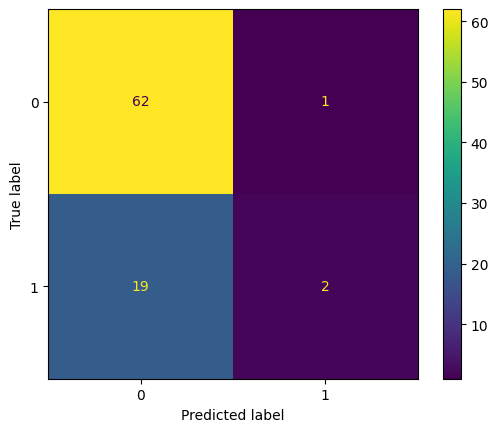

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn import metrics


lr = LogisticRegression(max_iter=1000, solver='saga')

param_grid = {'penalty': ['l1', 'l2'],
              'C': [0.01, 0.1, 0.2, 0.5, 10, 100],
              'fit_intercept': [True, False],
              'class_weight': [None, 'balanced']}

grid = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid.fit(X_train, y_train)

print('Best hyperparameters:', grid.best_params_)
print('Best accuracy score:', grid.best_score_)

y_pred = grid.best_estimator_.predict(X_test)

print(classification_report(y_test, y_pred))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

Best Hyperparameters: {'algorithm': 'ball_tree', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Best Accuracy Score: 0.7471027216856891
Testing Accuracy: 0.7976190476190477
              precision    recall  f1-score   support

           0       0.79      0.98      0.88        63
           1       0.83      0.24      0.37        21

    accuracy                           0.80        84
   macro avg       0.81      0.61      0.62        84
weighted avg       0.80      0.80      0.75        84



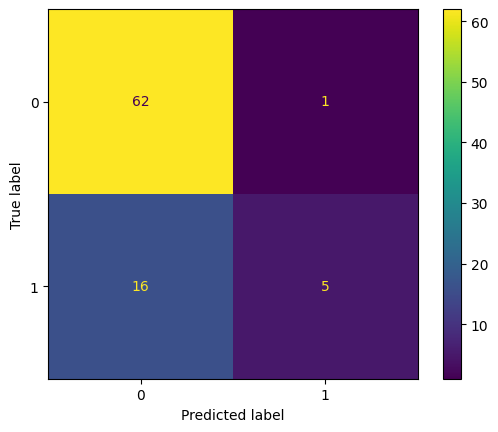

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


knn = KNeighborsClassifier()

param_grid = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [10, 20, 30],
              'p': [1, 2],
              'metric': ['euclidean', 'manhattan', 'minkowski']}

grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()


Best Hyperparameters: {'max_depth': 11, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 31}
Best Accuracy Score: 0.758955223880597
Testing Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        63
           1       0.50      0.10      0.16        21

    accuracy                           0.75        84
   macro avg       0.63      0.53      0.51        84
weighted avg       0.70      0.75      0.68        84



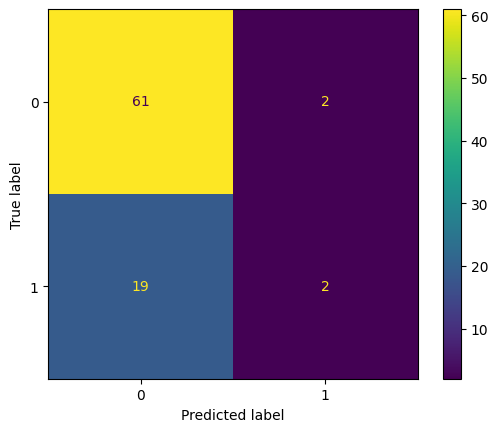

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

clf = RandomForestClassifier()

param_dist = {'n_estimators': randint(10, 100),
              'max_features': ['sqrt', 'log2'],
              'max_depth': [None] + list(range(2, 20)),
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)
random_search.fit(X_train, y_train)

print("Best Hyperparameters:", random_search.best_params_)
print("Best Accuracy Score:", random_search.best_score_)

best_estimator = random_search.best_estimator_
y_pred = best_estimator.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

## For C-Section

In [71]:
# features_c = ['Issues_Pregnancy_HyperTension','Hemoglobin','Excercise_During_Pregnency','BMI','Intercourse','Pollution_During_Pregnency','Issues_Pregnancy_Gastric_Issues','PCOS','Health_Concious_During_Pregnency','Weight_Before_Pregnency']
features_c = ['Weight_Before_Pregnency','Age_Of_Mother','Issues_Pregnancy_HyperTension','Issues_Pregnancy_Diabetes','Excercise_During_Pregnency','Sibling','IVF','Happy_About_Pregnency','Time_Spent_Mobile_During_Pregnency','Age_Father']

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

X = merged_df[features_c]
y = merged_df['C-section']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

# plot_tree(clf)

y_pred = clf.predict(X_test)

accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.5714285714285714
[[19 16]
 [20 29]]


In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.4642857142857143
[[22 13]
 [32 17]]


In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import graphviz

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# for i in range(len(clf.estimators_)):
#     dot_data = export_graphviz(clf.estimators_[i], out_file=None,
#                                feature_names=features_nicu,
#                                class_names=y.unique(),
#                                filled=True, rounded=True,
#                                special_characters=True)
#     graph = graphviz.Source(dot_data)
#     graph.render("decision_tree_" + str(i))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.5476190476190477
[[17 18]
 [20 29]]


In [75]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.5238095238095238
[[19 16]
 [24 25]]


In [76]:
import random

max_acc = 0
best_features = []

for i in range(1000):

    random_features = random.sample(feature_names, 15)

    X = merged_df[random_features]
    y = merged_df['C-section']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = DecisionTreeClassifier()

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = clf.score(X_test, y_test)

    if accuracy > max_acc:
        max_acc = accuracy
        best_features = random_features

print(max_acc)
print(best_features)


0.7023809523809523
['Smoke_During_Pregnency', 'Hemoglobin', 'IVF', 'Non_Veg_Teenage', 'Grains_Veges_Pulses_Rice_Marraige', 'Sunlight_Pregnency', 'More_Dairy_Products_Marraige', 'Fruits_Salads_Teenage', 'Grains_Veges_Pulses_Rice_Teenage', 'Age_Of_Mother', 'Age_Father', 'More_Dairy_Products_Pregnency', 'Education', 'Depressed_Marraige', 'Snacks_Carbohydrate_Pregnency']


In [77]:
import random

max_acc = 0
best_features = []

for i in range(100):

    random_features = random.sample(feature_names, 10)

    X = merged_df[random_features]
    y = merged_df['C-section']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = clf.score(X_test, y_test)

    if accuracy > max_acc:
        max_acc = accuracy
        best_features = random_features

print(max_acc)
print(best_features)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.5952380952380952
['Hobby_Spending_Time', 'No_of_sibling', 'Smoke_During_Teenage', 'Travel_Mode_Marraige', 'Age_Of_Mother', 'Alcohol_During_Teenage', 'Health_Concious_During_Pregnency', 'Works_Hours_Pregnency', 'Alcohol_After_Marraige', 'Depressed_Marraige']


In [78]:
import random

max_acc = 0
best_features = []

for i in range(100):

    random_features = random.sample(feature_names, 10)

    X = merged_df[random_features]
    y = merged_df['C-section']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = RandomForestClassifier(n_estimators=100)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = clf.score(X_test, y_test)

    if accuracy > max_acc:
        max_acc = accuracy
        best_features = random_features

print(max_acc)
print(best_features)


0.6309523809523809
['Snacks_Carbohydrate_Pregnency', 'Works_As_Pregnency', 'More_Dairy_Products_Teenage', 'Issues_Pregnancy_Low_Amniotic', 'Hobby_Eating', 'Works_As_Marraige', 'Sibling', 'Leave_In_Pregnency', 'Time_Spent_Mobile_Teengage', 'Health_Concious_During_Pregnency']
